In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"F:\DSA\Kaggle\Drug Classification.csv")

In [3]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
data.describe(include = 'object')

,Sex,BP,Cholesterol,Drug
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,DrugY
freq,104,77,103,91


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


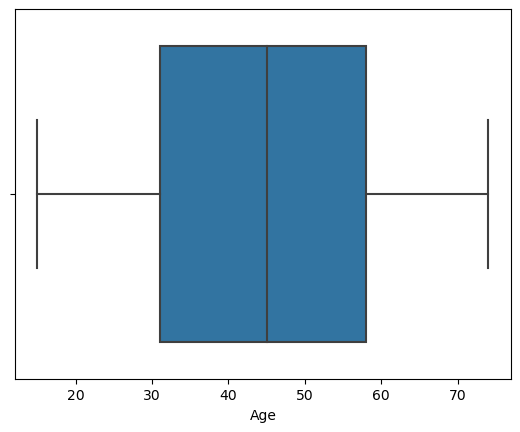

In [7]:
sns.boxplot(x = data['Age'])
plt.show()

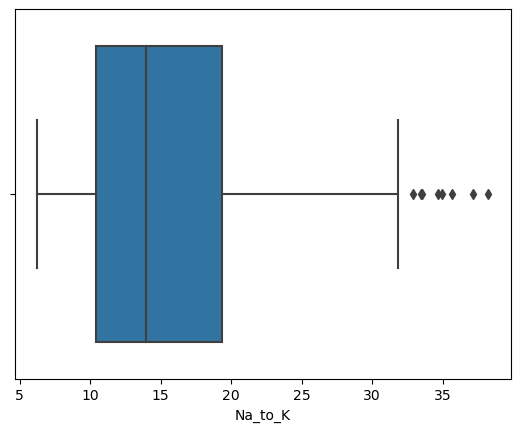

In [8]:
sns.boxplot( x = data['Na_to_K'])
plt.show()

In [9]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
oe = OrdinalEncoder()
le = LabelEncoder()

In [10]:
data['BP'] = oe.fit_transform(data[['BP']])

In [11]:
data['Cholesterol'] = oe.fit_transform(data[['Cholesterol']])

In [12]:
data['Sex'] = le.fit_transform(data['Sex'])

In [13]:
x = data.drop('Drug', axis = 1)
y = data['Drug']

from sklearn.model_selection import train_test_split, cross_val_score

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25, random_state=42)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

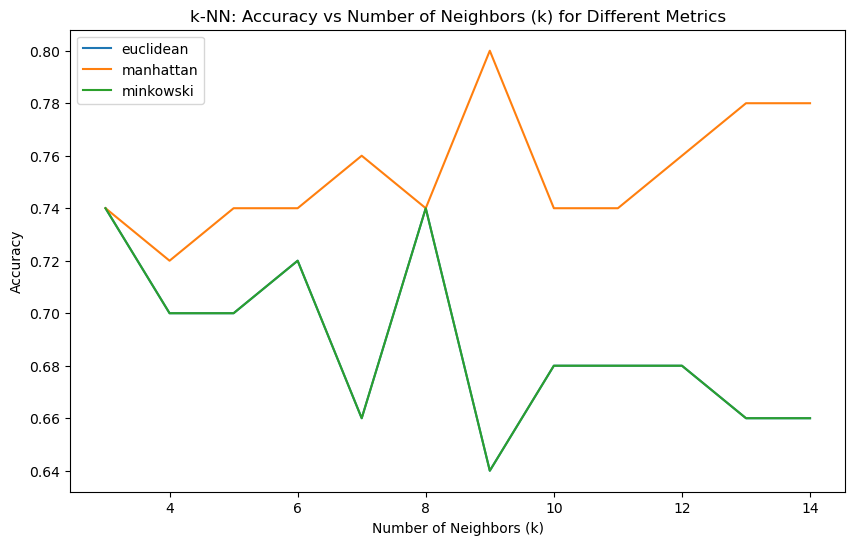

In [16]:
neighbors = np.arange(3, 15)
metrics = ['euclidean', 'manhattan', 'minkowski']
metric_k = {metric: [] for metric in metrics}

for metric in metrics:
    for k in neighbors:
        classifier = KNeighborsClassifier(n_neighbors=k, metric=metric, p=2)
        classifier.fit(x_train, y_train)
        accuracy = classifier.score(x_test, y_test)
        metric_k[metric].append(accuracy)

plt.figure(figsize=(10, 6))
for metric, accuracies in metric_k.items():
    plt.plot(neighbors, accuracies, label=metric)
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("k-NN: Accuracy vs Number of Neighbors (k) for Different Metrics")
plt.legend()
plt.show()

In [17]:
knn = KNeighborsClassifier(n_neighbors= 9, metric='manhattan', p=2)

In [18]:
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

In [19]:
knn.score(x_test, y_test)

0.8

In [20]:
from sklearn.svm import SVC

svc = SVC(kernel = 'linear')

In [21]:
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [22]:
svc.score(x_test, y_test)

1.0

In [23]:
cv_scores = cross_val_score(svc, x, y, cv = 5)

In [24]:
cv_scores

array([1.  , 1.  , 1.  , 0.95, 1.  ])

In [25]:
cv_scores.mean()

0.99

In [26]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

In [27]:
cv_scores = cross_val_score(svc, x, y, cv = skf)

In [28]:
cv_scores

array([1.  , 1.  , 1.  , 0.95, 1.  ])

In [29]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier()

In [30]:
random.fit(x_train, y_train)

RandomForestClassifier()

In [31]:
random.score(x_test, y_test)

1.0

In [32]:
cv_scores = cross_val_score(random, x, y, cv = skf)

In [33]:
cv_scores

array([1. , 1. , 1. , 0.9, 1. ])

In [34]:
cv_scores.mean()

0.9800000000000001

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test, svc.predict(x_test)))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        20
       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        15

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



### SVC Predicts the result despite the involvement of outliers.